In [ ]:
# quick example
!python3 /home/kozi/Documents/NeMo/examples/asr/speech_to_text_eval.py \
    dataset_manifest=/home/kozi/Documents/fleurs/en_us/faster_whisper_punctuation_tiny_test.json \
    use_cer=True \
    only_score_manifest=True

# run eval without output manifest
# $ python3 /home/kozi/Documents/NeMo/examples/asr/speech_to_text_eval.py model_path=/home/kozi/Documents/stt_en_conformer_ctc_small.nemo dataset_manifest=/home/kozi/Documents/get_librispeech_test/data/test_other.json output_filename=/home/kozi/Documents/output/libri_testrun_eval_1.json use_cer=False batch_size=4
# $ python3 /home/kozi/Documents/NeMo/examples/asr/speech_to_text_eval.py model_path=/home/kozi/Documents/stt_en_conformer_ctc_large.nemo dataset_manifest=/home/kozi/Documents/get_librispeech_test/data/test_other.json output_filename=/home/kozi/Documents/get_librispeech_test/out_large_CER_1.json use_cer=True batch_size=1

In [11]:
# function to traverse the Fleurs dataset

import os
import matplotlib.pyplot as plt
import re
import subprocess


def traverse_fleurs(skip_Hungarian=False):
    fleurs_dataset_dirs = ["be_by", "de_de", "en_us", "fr_fr", "gl_es", "hr_hr", "hu_hu", "it_it", "pl_pl", "ru_ru", "uk_ua"]
    results = {}
    eval_script = "/home/kozi/Documents/NeMo/examples/asr/speech_to_text_eval.py"
    params = "use_cer=True only_score_manifest=True"

    for subdir_string in fleurs_dataset_dirs:
        if skip_Hungarian and subdir_string == "hu_hu":
            continue

        subdir = os.path.join("/home/kozi/Documents/fleurs", subdir_string)
        for file in os.listdir(subdir):
            if file.startswith("whisper_transcription_{}_".format(subdir_string)) and file.endswith(".json"):
                file = os.path.join(subdir, file)
                #print("Evaluating {}".format(file))


                for model_name in ["tiny", "base", "small", "medium", "large", "large-v2"]: 
                    if model_name in file: 
                        command = "export MKL_THREADING_LAYER=GNU \n python3 {} dataset_manifest={} {}".format(eval_script, file, params)
                        output = subprocess.check_output(command, shell=True).decode()  
                        wer, cer = map(float, re.findall(r'[0-9]*\.[0-9]*', output))                                                                                                  
                        print("{} ### WER={} %; CER={} %".format(model_name, wer, cer)) 
                        if subdir_string not in results:
                            results[subdir_string] = {model_name: {"WER": wer, "CER": cer}}
                        else:
                            results[subdir_string][model_name] = {"WER": wer, "CER": cer}

            elif file == "fastconformer_capitalized_output_utf8.json":
                pass #TODO
    
    print(results)

traverse_fleurs()

[NeMo W 2023-10-22 18:56:27 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=92.19 %; CER=33.22 %


[NeMo W 2023-10-22 18:56:34 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=101.74 %; CER=42.04 %


[NeMo W 2023-10-22 18:56:40 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=90.05 %; CER=32.39 %


[NeMo W 2023-10-22 18:56:46 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=95.13 %; CER=36.37 %


[NeMo W 2023-10-22 18:56:53 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=25.89 %; CER=8.4 %


[NeMo W 2023-10-22 18:56:59 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=37.89 %; CER=13.05 %


[NeMo W 2023-10-22 18:57:05 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=10.45 %; CER=3.65 %


[NeMo W 2023-10-22 18:57:12 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=14.68 %; CER=4.54 %


[NeMo W 2023-10-22 18:57:18 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=11.93 %; CER=4.44 %


[NeMo W 2023-10-22 18:57:24 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=21.93 %; CER=9.1 %


[NeMo W 2023-10-22 18:57:31 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=16.97 %; CER=6.81 %


[NeMo W 2023-10-22 18:57:37 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=13.73 %; CER=5.11 %


[NeMo W 2023-10-22 18:57:43 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=49.68 %; CER=21.99 %


[NeMo W 2023-10-22 18:57:50 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=20.33 %; CER=7.37 %


[NeMo W 2023-10-22 18:57:56 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=33.77 %; CER=13.92 %


[NeMo W 2023-10-22 18:58:02 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=15.11 %; CER=5.62 %


[NeMo W 2023-10-22 18:58:08 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=47.69 %; CER=13.5 %


[NeMo W 2023-10-22 18:58:15 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=55.94 %; CER=16.1 %


[NeMo W 2023-10-22 18:58:21 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=72.5 %; CER=24.45 %


[NeMo W 2023-10-22 18:58:27 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=63.85 %; CER=20.57 %


[NeMo W 2023-10-22 18:58:34 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=90.47 %; CER=36.43 %


[NeMo W 2023-10-22 18:58:40 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=70.14 %; CER=21.64 %


[NeMo W 2023-10-22 18:58:47 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=42.93 %; CER=11.86 %


[NeMo W 2023-10-22 18:58:53 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=26.7 %; CER=7.79 %


[NeMo W 2023-10-22 18:59:00 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=32.28 %; CER=9.17 %


[NeMo W 2023-10-22 18:59:06 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=94.79 %; CER=41.27 %


[NeMo W 2023-10-22 18:59:12 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=76.78 %; CER=30.44 %


[NeMo W 2023-10-22 18:59:18 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=48.5 %; CER=14.75 %


[NeMo W 2023-10-22 18:59:25 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=14.5 %; CER=4.24 %


[NeMo W 2023-10-22 18:59:31 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=25.03 %; CER=6.95 %


[NeMo W 2023-10-22 18:59:37 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=10.41 %; CER=3.52 %


[NeMo W 2023-10-22 18:59:44 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=38.47 %; CER=11.22 %


[NeMo W 2023-10-22 18:59:50 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=14.15 %; CER=4.43 %


[NeMo W 2023-10-22 18:59:56 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=60.92 %; CER=21.47 %


[NeMo W 2023-10-22 19:00:03 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=22.31 %; CER=6.85 %


[NeMo W 2023-10-22 19:00:09 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=41.59 %; CER=13.02 %


[NeMo W 2023-10-22 19:00:15 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=30.39 %; CER=8.56 %


[NeMo W 2023-10-22 19:00:21 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=18.75 %; CER=5.25 %


[NeMo W 2023-10-22 19:00:28 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=44.37 %; CER=13.17 %


[NeMo W 2023-10-22 19:00:34 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=13.32 %; CER=3.92 %


[NeMo W 2023-10-22 19:00:40 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


medium ### WER=18.38 %; CER=5.63 %


[NeMo W 2023-10-22 19:00:47 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


tiny ### WER=71.88 %; CER=24.66 %


[NeMo W 2023-10-22 19:00:53 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


base ### WER=54.52 %; CER=16.97 %


[NeMo W 2023-10-22 19:00:59 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


small ### WER=30.7 %; CER=8.75 %
{'be_by': {'small': {'WER': 92.19, 'CER': 33.22}, 'tiny': {'WER': 101.74, 'CER': 42.04}, 'medium': {'WER': 90.05, 'CER': 32.39}, 'base': {'WER': 95.13, 'CER': 36.37}}, 'de_de': {'base': {'WER': 25.89, 'CER': 8.4}, 'tiny': {'WER': 37.89, 'CER': 13.05}, 'medium': {'WER': 10.45, 'CER': 3.65}, 'small': {'WER': 14.68, 'CER': 4.54}}, 'en_us': {'medium': {'WER': 11.93, 'CER': 4.44}, 'tiny': {'WER': 21.93, 'CER': 9.1}, 'base': {'WER': 16.97, 'CER': 6.81}, 'small': {'WER': 13.73, 'CER': 5.11}}, 'fr_fr': {'tiny': {'WER': 49.68, 'CER': 21.99}, 'small': {'WER': 20.33, 'CER': 7.37}, 'base': {'WER': 33.77, 'CER': 13.92}, 'medium': {'WER': 15.11, 'CER': 5.62}}, 'gl_es': {'medium': {'WER': 47.69, 'CER': 13.5}, 'small': {'WER': 55.94, 'CER': 16.1}, 'tiny': {'WER': 72.5, 'CER': 24.45}, 'base': {'WER': 63.85, 'CER': 20.57}}, 'hr_hr': {'tiny': {'WER': 90.47, 'CER': 36.43}, 'base': {'WER': 70.14, 'CER': 21.64}, 'small': {'WER': 42.93, 'CER': 11.86}, 'medium': {'WER': 26.7, 

In [14]:
from json import loads

string = "{'be_by': {'small': {'WER': 92.19, 'CER': 33.22}, 'tiny': {'WER': 101.74, 'CER': 42.04}, 'medium': {'WER': 90.05, 'CER': 32.39}, 'base': {'WER': 95.13, 'CER': 36.37}}, 'de_de': {'base': {'WER': 25.89, 'CER': 8.4}, 'tiny': {'WER': 37.89, 'CER': 13.05}, 'medium': {'WER': 10.45, 'CER': 3.65}, 'small': {'WER': 14.68, 'CER': 4.54}}, 'en_us': {'medium': {'WER': 11.93, 'CER': 4.44}, 'tiny': {'WER': 21.93, 'CER': 9.1}, 'base': {'WER': 16.97, 'CER': 6.81}, 'small': {'WER': 13.73, 'CER': 5.11}}, 'fr_fr': {'tiny': {'WER': 49.68, 'CER': 21.99}, 'small': {'WER': 20.33, 'CER': 7.37}, 'base': {'WER': 33.77, 'CER': 13.92}, 'medium': {'WER': 15.11, 'CER': 5.62}}, 'gl_es': {'medium': {'WER': 47.69, 'CER': 13.5}, 'small': {'WER': 55.94, 'CER': 16.1}, 'tiny': {'WER': 72.5, 'CER': 24.45}, 'base': {'WER': 63.85, 'CER': 20.57}}, 'hr_hr': {'tiny': {'WER': 90.47, 'CER': 36.43}, 'base': {'WER': 70.14, 'CER': 21.64}, 'small': {'WER': 42.93, 'CER': 11.86}, 'medium': {'WER': 26.7, 'CER': 7.79}}, 'hu_hu': {'medium': {'WER': 32.28, 'CER': 9.17}, 'tiny': {'WER': 94.79, 'CER': 41.27}, 'base': {'WER': 76.78, 'CER': 30.44}, 'small': {'WER': 48.5, 'CER': 14.75}}, 'it_it': {'small': {'WER': 14.5, 'CER': 4.24}, 'base': {'WER': 25.03, 'CER': 6.95}, 'medium': {'WER': 10.41, 'CER': 3.52}, 'tiny': {'WER': 38.47, 'CER': 11.22}}, 'pl_pl': {'medium': {'WER': 14.15, 'CER': 4.43}, 'tiny': {'WER': 60.92, 'CER': 21.47}, 'small': {'WER': 22.31, 'CER': 6.85}, 'base': {'WER': 41.59, 'CER': 13.02}}, 'ru_ru': {'base': {'WER': 30.39, 'CER': 8.56}, 'small': {'WER': 18.75, 'CER': 5.25}, 'tiny': {'WER': 44.37, 'CER': 13.17}, 'medium': {'WER': 13.32, 'CER': 3.92}}, 'uk_ua': {'medium': {'WER': 18.38, 'CER': 5.63}, 'tiny': {'WER': 71.88, 'CER': 24.66}, 'base': {'WER': 54.52, 'CER': 16.97}, 'small': {'WER': 30.7, 'CER': 8.75}}}"
results = loads(string.replace("'", '"'))
print(results["be_by"]["small"]["WER"])

92.19


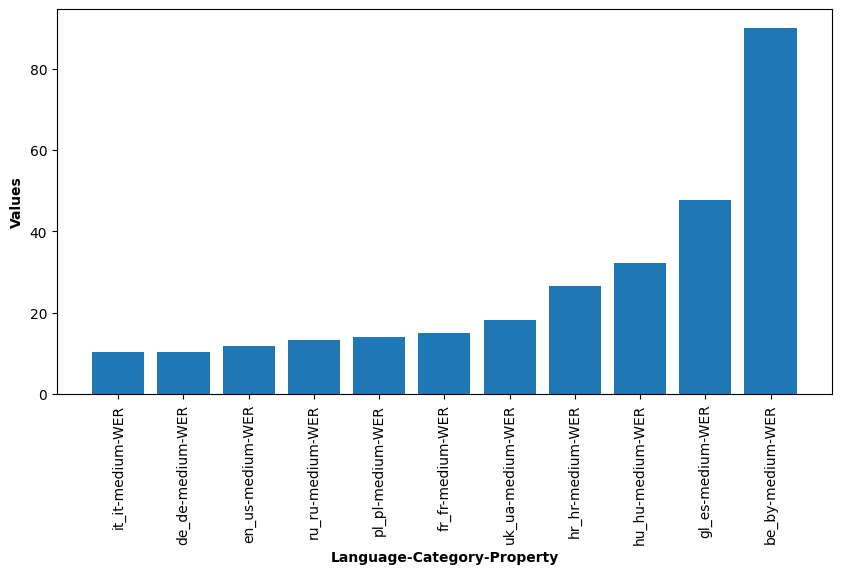

In [24]:
import matplotlib.pyplot as plt                                 
import numpy as np                                              
                                                                
data = results                                          
                                                                
properties = []                                                 
values = []                                                     
                                                                
for lang, categories in data.items():                           
    for cat, props in categories.items():   
        if cat != "medium":
            continue                    
        for prop, val in props.items():     
            if prop != "WER":
                continue
            properties.append(f"{lang}-{cat}-{prop}")           
            values.append(val)                                  

combined = sorted(list(zip(values, properties)))
values, properties = zip(*combined)

# set figure size                                               
plt.figure(figsize=(10, 5))                                     
                                                                
# create a bar chart                                            
plt.bar(properties, values)                                     
                                                                
# rotate x-axis labels if they overlap                          
plt.xticks(rotation=90)                                         
                                                                
# add labels                                                    
plt.xlabel('Language-Model-Property', fontweight ='bold')    
plt.ylabel('%', fontweight ='bold')                        
                                                                
# show the plot                                                 
plt.show()                                                      


In [ ]:
# todo create eval manually

from nemo.collections.asr.metrics.wer import word_error_rate
# ref. /home/kozi/Documents/NeMo/nemo/collections/asr/metrics/wer.py

# this function uses editdistance.eval(), and on a quick google search there are many other possible candidates, need to explore later
# ref. https://stackoverflow.com/questions/2460177/edit-distance-in-python
word_error_rate()